<a href="https://colab.research.google.com/github/yeesem/Time-Series-Data-Analysis/blob/main/ETS_Champagne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

In [4]:
!pip install -U statsmodels

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv

In [16]:
#skipfooter = 2 - skip last 2 lines
df = pd.read_csv('/content/perrin-freres-monthly-champagne.csv',index_col = 'Month',skipfooter = 2,parse_dates = True)

<ipython-input-16-068c8f67ef90>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('/content/perrin-freres-monthly-champagne.csv',index_col = 'Month',skipfooter = 2,parse_dates = True)


In [17]:
df.head()

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [18]:
df.isnull().sum()

Perrin Freres monthly champagne sales millions ?64-?72    0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column                                                  Non-Null Count  Dtype
---  ------                                                  --------------  -----
 0   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [20]:
df.columns = ['Sales']

<Axes: xlabel='Month'>

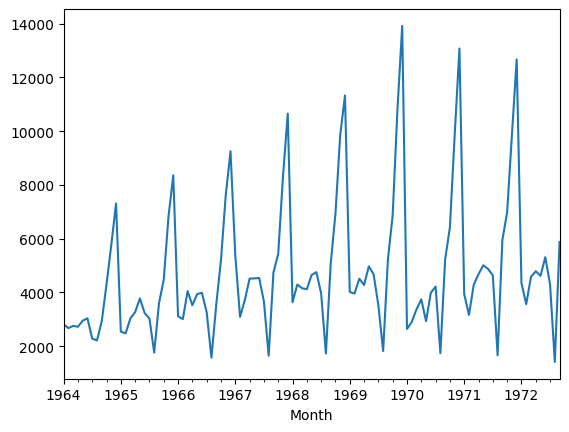

In [21]:
#Seasonal pattern
#Seasonal not constant and increase over time
df['Sales'].plot()

In [22]:
df.index.freq = 'MS'

In [23]:
NTest = 12
train = df.iloc[:-NTest]
test = df.iloc[-NTest:]

In [25]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [27]:
hw = ExponentialSmoothing(
    train['Sales'],
    initialization_method = 'legacy-heuristic',
    trend = 'add',seasonal = 'add',seasonal_periods = 12
)

res_hw = hw.fit()

In [28]:
df.loc[train_idx,'Holtwinters'] = res_hw.fittedvalues
df.loc[test_idx,'Holtwinters'] = res_hw.forecast(NTest)

<Axes: xlabel='Month'>

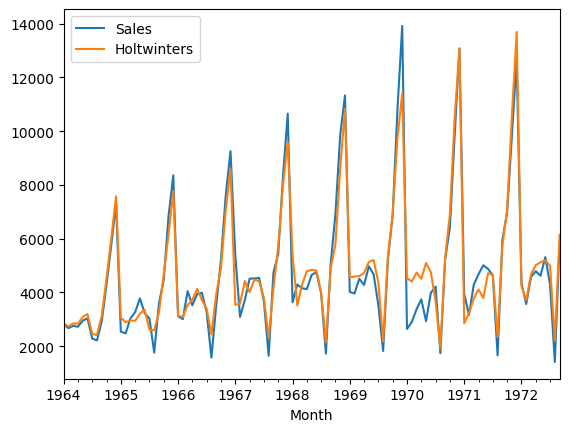

In [29]:
df[['Sales','Holtwinters']].plot()

In [30]:
r2_score(train['Sales'],res_hw.fittedvalues)

0.9169984903500262

In [31]:
r2_score(test['Sales'],res_hw.forecast(NTest))

0.9680340910154467